In [75]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem description

Here you will set up the problem for
$$ u_t + c u_x = 0$$
with periodic BC on the interval [0,1]

In [76]:
c = 1.0
T = 1.0 / c # end time

#### Set up the grid

`hx` is the grid spacing in the `x`-direction

`x` are the grid coordinates

`xx` are really fine grid coordinates

In [77]:
nx = 100
x = np.linspace(0, 1, nx, endpoint=False)
hx = x[1] - x[0]
xx = np.linspace(0, 1, 100, endpoint=False)
print(hx)

0.01


Now define an initial condition

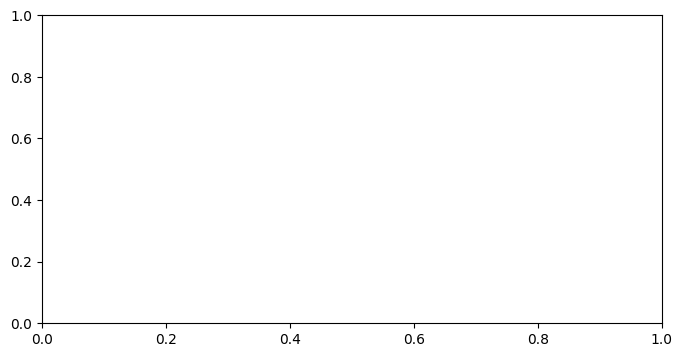

In [78]:
def square(x):
    u = np.zeros(x.shape)
    u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    return u

f = square
fig, ax = plt.subplots(figsize=(8,4))
# TODO: plot the initial condition


#### Setting time step $h_t$

Now we need a time step.  Let
$$ \lambda = a \frac{h_t}{h_x}$$
and
$$ h_t = h_x \frac{\lambda}{c}$$

So we first set the parameter $\lambda$

In [79]:
lmbda = 18.0   # TODO: pick lmbda > 0
ht = hx * lmbda / c
nt = int(T/ht)

print('Setting...')
print(f'lambda = {lmbda}')
print(f'     T = {T}')
print(f'    hx = {hx}')
print('...results in...')
print(f'tsteps = {nt}')
print(f'    ht = {ht}')


Setting...
lambda = 18.0
     T = 1.0
    hx = 0.01
...results in...
tsteps = 5
    ht = 0.18


Now make an index list, called $J$, so that we can access $J+1$ and $J-1$ easily

In [80]:
J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

# Run

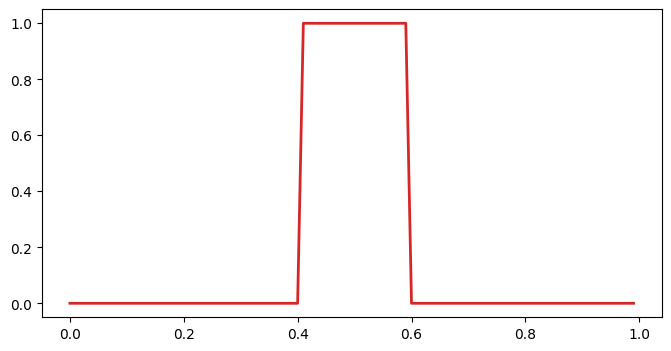

In [81]:
err = np.zeros((nt+1, nx))
u = f(x)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, u, color='tab:red', ls='-', lw=2)

for tstep in range(1, nt+1):
    k=10
    u[k]=u[k]-lmbda * (u[k]-u[k-1])
    u[J]=u[J]-lmbda * (u[J]-u[Jm1])
    # TODO: code ETBS with J and Jm1
    if tstep % 10 ==0:
      ax.plot(x,u,lw=1,color='tab:blue')


    # TODO: plot the solution at each step

#### Check the error?

How would you do this?